# Atelier  : ANOVA

les noms  : 
1. OISSAFE Imad 
2. LATRACH EL Habib
3. ENNASTY Hamza

`jeu de données`:

Le jeu de données "iris" concerne la mesure de différentes caractéristiques de fleurs d'iris de trois espèces différentes. Les caractéristiques mesurées comprennent la longueur et la largeur des sépales et des pétales, ainsi que l'identification de l'espèce d'iris correspondante.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Partie 1 : ANOVA à un facteur avec repetetion

In [26]:
# read the data from the excel file
df = pd.read_excel('data.xlsx')


In [27]:
df.head()

,Year_0,Year_5,Year_10,Year_15
0,74,79,71,78
1,74,74,80,81
2,78,77,81,77
3,75,76,75,83
4,70,80,76,79


Verification de normalité

In [28]:
from scipy.stats import shapiro

for column in df.columns:
    stat, p = shapiro(df[column])
    print(f"Results for {column}: Statistics={stat}, p={p}")

Results for Year_0: Statistics=0.9723070859909058, p=0.60403972864151
Results for Year_5: Statistics=0.9618178606033325, p=0.34446218609809875
Results for Year_10: Statistics=0.9644396305084229, p=0.4000464677810669
Results for Year_15: Statistics=0.9719657301902771, p=0.5942472219467163


Verification d'homogénéite de la variance


In [29]:
from scipy.stats import levene

stat, p = levene(df['Year_0'], df['Year_5'], df['Year_10'], df['Year_15'])
print(f"Results for Levene's test: Statistics={stat}, p={p}")

if p > 0.05:
    print("Equal variances")
else:
    print("Unequal variances")
    

Results for Levene's test: Statistics=2.8859992712698137, p=0.03867689723943712
Unequal variances


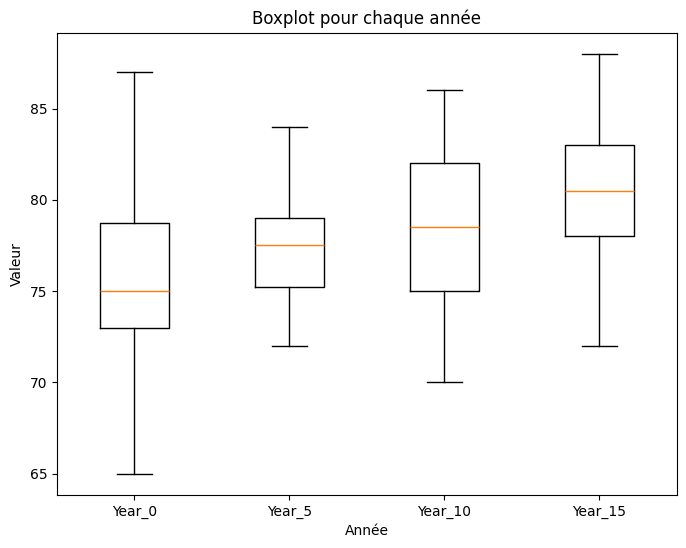

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir le DataFrame de format large à format long
df_melt = df.melt(var_name='Year', value_name='Value')

# Tracer le boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_melt['Value'][df_melt['Year'] == year] for year in df_melt['Year'].unique()], labels=df_melt['Year'].unique())
plt.title('Boxplot pour chaque année')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.show()

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Melt DataFrame from wide format to long format
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Year_0', 'Year_5', 'Year_10', 'Year_15'])
df_melt.columns = ['index', 'treatments', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                    sum_sq     df         F    PR(>F)
C(treatments)   399.691667    3.0  7.609051  0.000109
Residual       2031.100000  116.0       NaN       NaN


## Partie 2 : ANOVA à un facteur

Ce jeu de données semble être une étude sur la prise de poids des rats en fonction de différents régimes      
alimentaires (quantités élevées/faibles de bœuf, porc et céréales). Le design est un plan en blocs randomisés    
avec plusieurs facteurs

In [5]:
dataset = pd.read_csv('dataset.csv', sep=";", decimal='.')
dataset.head()

,Weight_Gain,Diet_Amount,Diet_Type
0,118,1,1
1,117,1,1
2,111,1,1
3,107,1,1
4,104,1,1


##### 1 : On veut étudier ici l'influence de type de régime alimentaire (Diet Type) sur le prise de poids des rats(Weight Gain).


On peut visualiser l'influence de la type de régime alimentaire en affichant ces boîtes à moustaches

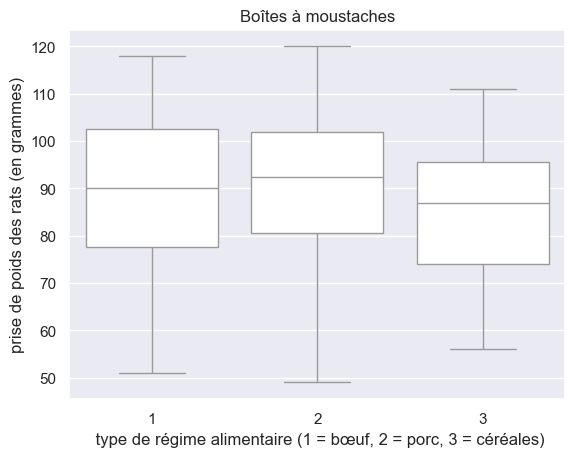

In [6]:
sns.set()

ax = sns.boxplot(x="Diet_Type", y="Weight_Gain", data=dataset, color='white')
plt.xlabel(' type de régime alimentaire (1 = bœuf, 2 = porc, 3 = céréales)')
plt.ylabel('prise de poids des rats (en grammes)')
plt.title('Boîtes à moustaches')
plt.show()

les boîtes à moustaches ne sont pas très distinctes, même s'il y a un peu plus de variance cela suggère que les distributions de la prise de poids ne sont pas significativement différentes enter les type de régime alimentaire

In [7]:
anova_variete = smf.ols('Weight_Gain~Diet_Type', data=dataset).fit()
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Type,220.900000,1.0,0.801863,0.374238
Residual,15978.033333,58.0,NaN,NaN


Pour le facteur 'Diet_Type', la statistique de test F est de 0.801863 avec une valeur p de 0.374238.   
Puisque la valeur p (0.374238) est supérieure au niveau de signification de 0.05, on ne rejette pas l'hypothèse nulle. donc les distributions de la prise de poids ne sont pas significativement différentes

##### 2 : On veut étudier ici l'influence de quantité de régime alimentaire (Diet Amount) sur le prise de poids des rats(Weight Gain).


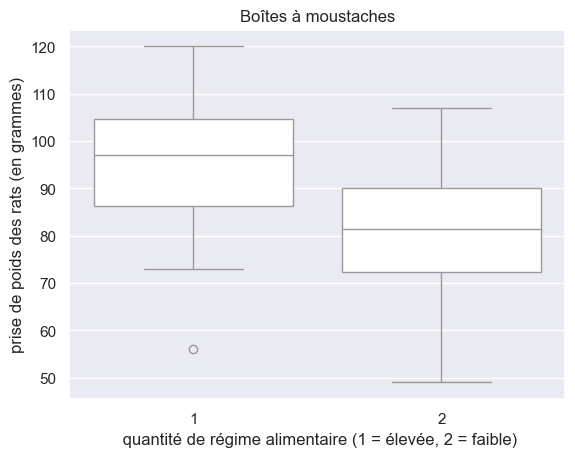

In [8]:
sns.set()

ax = sns.boxplot(x="Diet_Amount", y="Weight_Gain", data=dataset, color='white')
plt.xlabel(' quantité de régime alimentaire (1 = élevée, 2 = faible)')
plt.ylabel('prise de poids des rats (en grammes)')
plt.title('Boîtes à moustaches')
plt.show()

les boîtes à moustaches  sont distinctes, cela suggère que les distributions de la prise de poids est significativement différente entre les différents niveaux de quantité de régime alimentaire

In [9]:
anova_variete = smf.ols('Weight_Gain~Diet_Amount', data=dataset).fit()
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Amount,3168.266667,1.0,14.102077,0.000403
Residual,13030.666667,58.0,NaN,NaN


Pour le facteur  quantité de régime alimentaire  (Diet Amount), la statistique de test F est de 14.102077 avec une valeur p très faible de 0.000403.  
Puisque la valeur p est inférieure au niveau de signification de 0.05, on rejette l'hypothèse nulle.  
Il y a des preuves statistiques suffisantes pour affirmer que la variation dans la prise de poids des rats est significativement différente entre les différents niveaux de 'Diet_Amount'.